# CREATE DATA OBJECT TWOPData to load ALL recording data
## The data basepath should contain
    - INTAN FILES
        - info.rhd
        - amplifier_analogin_auxiliary_int16.dat, analogin.dat, (basename).dat

    - FACEMAP FILES
        - either a ..._proc.npy file or ..._proc.mat file

    - SUITE2P FOLDER
        - folder containing preprocessed 'suite2p' folder and its name starts with 'field...'

In [3]:
## Import data wrapper from main file 
from TwoPDataPipeline import TwoPData
import os 
%load_ext autoreload
%autoreload 2

# path to directory that contains all data files from recording

data_basepath = '/mnt/Gianna_Mattessich/Arenski_Data/NGF_MMN/WT/WT7628/WT7628_day1'

# encapsulate and load data (intan signals, facemap, and suite2p outputs) into all_data variable for analysis use 
# if using default channels for 2P recordings, can just call 
#                                              all_data = TwoPData(data_basepath)
all_data = TwoPData(suite2p_basepath=data_basepath, intan_basepath=data_basepath, facemap_path=data_basepath,
                    twop_channel=2, pd_channel=5, camera_channel=3, treadmill_channel=6)

/mnt/Gianna_Mattessich/Arenski_Data/NGF_MMN/WT/WT7628/WT7628_day1/field_depth20um/suite2p /mnt/Gianna_Mattessich/Arenski_Data/NGF_MMN/WT/WT7628/WT7628_day1/field_depth20um/suite2p/plane0

Reading Intan Technologies RHD Data File, Version 1.5

Found 0 amplifier channels.
Found 0 auxiliary input channels.
Found 0 supply voltage channels.
Found 8 board ADC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.
Found 0 temperature sensors channels.

Getting transitions from 0:7691.47195 s
Found 10400 raw triggers
Could not confirm alignment of scope and triggers.
Getting transitions from 0:7691.47195 s
Found 2348 raw triggers
Getting transitions from 0:7691.47195 s
Found 229569 raw triggers
Getting transitions from 0:7691.47195 s
Found 1347915 raw triggers
Found facemap file path /mnt/Gianna_Mattessich/Arenski_Data/NGF_MMN/WT/WT7628/WT7628_day1/WT7628_10_21_24_Lamp5GCamp_V1_MMN_face_2024-10-21-155230-0000_proc.npy


##### Save to joblib to save time reloading all data later

In [ ]:
import joblib, os

data_output = os.path.join(data_basepath, 'twopdata.joblib')
if not os.path.exists(data_output):
    joblib.dump(all_data, data_output, compress=("lz4", 3))

##### Reload joblib file

joblib.load(data_output)

### Ex. Get a raw intan signal and its timings

##### Camera

In [18]:
camera_signal = all_data.camera_raw
camera_times = all_data.camera_times
print(f'Cam signal raw: {camera_signal}')
print(f'Camera trigger times: {camera_times}')

Cam signal raw: [3.24195561 3.29029641 3.29996457 ... 3.28385097 3.29996457 3.26693169]
Camera trigger times: [  31.2491    31.28505   31.32125 ... 7683.62565 7683.65895 7683.6923 ]


##### Treadmill

In [20]:
treadmill_signal = all_data.treadmill_raw
print(f'Treadmill signal raw: {treadmill_signal}')

Treadmill signal raw: [1.25605512 1.25202672 1.25202672 ... 1.2568608  1.2548466  1.25605512]


##### Scope

In [21]:
scope_times = all_data.scope_times
print(f'Scope trigger times: {scope_times}')

Scope trigger times: [  40.6442    41.37605   42.108   ... 7650.79205 7651.524   7652.25595]


## Get suite2p object from TwoPData
(created from class definition in getSuite2POutput)

In [12]:
suite2p_output = all_data.s2p_out

### Ex. get ΔF/F traces and save to CSV

In [2]:
import os 

deltaF_savepath = os.path.join(data_basepath, 'deltaF.csv')
# calc deltaF without saving -> 
#                              dff = suite2p_output.calc_deltaF(), see other possible params in getSuite2POutput.py

# deltaF function returns both dff array and estimated time array (1D). To get only dff, specify index 0 when defining
# get deltaF as numpy array
deltaF = suite2p_output.calc_deltaF(save_csv=deltaF_savepath)[0]

# load as dataframe
deltaF_dataframe = suite2p_output.calc_deltaF(output_df=True)[0]

# get neuropil spikes (optional)
deltaF_neuropils = suite2p_output.calc_deltaF(F_neuropil=True)[0]

deltaF_neuropils_dataframe = suite2p_output.calc_deltaF(F_neuropil=True, output_df=True)[0]

NameError: name 'data_basepath' is not defined

In [7]:
deltaF_dataframe.head().iloc[:, 0:5]

,0,1,2,3,4
0,0.000000,0.732064,1.464129,2.196193,2.928258
1,-0.083254,0.001216,0.079579,0.102273,0.012275
2,0.019921,0.296256,0.280696,0.007841,0.079952
3,0.075467,0.114184,0.126733,0.175848,0.088120
4,-0.023879,0.652193,0.333986,0.136503,0.097814


In [16]:
deltaF_neuropils_dataframe.head().iloc[:, 0:5]

,0,1,2,3,4
0,0.000000,0.732064,1.464129,2.196193,2.928258
1,-0.192842,0.017124,0.055907,0.244451,0.022444
2,0.035426,0.473022,0.442829,-0.004641,0.168350
3,0.131629,0.171367,0.178327,0.241303,0.117538
4,-0.021765,2.509089,1.147232,0.671692,0.454902


### Ex. get cell spikes

In [8]:
spikes_savepath = os.path.join(data_basepath, 'spikes.csv')
# get array of spikes and save to csv
spikes_arr = suite2p_output.get_cell_spikes(save_to_csv=True, output_filepath= spikes_savepath)
# get dataframe of spikes -> (num_cells, num_frames)
spikes_df = suite2p_output.get_cell_spikes(output_df=True)

In [6]:
# inspect dataframe
spikes_df.head().iloc[:, 0:5]

,0,1,2,3,4
0,0.0,50.765545,12.826757,22.856503,0.0
1,0.0,482.167542,0.000000,0.000000,0.0
2,0.0,78.417122,39.992268,51.504822,0.0
3,0.0,650.387573,0.000000,0.000000,0.0
4,0.0,19.674032,0.000000,0.000000,0.0


### Ex. get raw fluorescence, num cells, etc

In [22]:
print(f'Raw fluourescence {suite2p_output.F}')
print(f'Number cells {suite2p_output.num_cells}')

Raw fluourescence [[ 667.4568   723.71606  776.35187 ...  761.26544  821.4877   821.4877 ]
 [1036.7976  1288.4706  1274.3833  ... 1186.7699  1256.8241  1256.8241 ]
 [ 827.5935   855.89923  865.1357  ...  808.67596  910.91565  910.91565]
 ...
 [ 336.1732   340.5882   314.1919  ...  288.02185  314.32724  314.32724]
 [ 397.5971   411.43158  420.15482 ...  345.8997   348.80142  348.80142]
 [ 534.19476  621.2366   563.6658  ...  567.9311   404.02505  404.02505]]
Number cells 22


### Ex. calculate SNR

In [24]:
SNR = suite2p_output.get_SNR()
SNR

array([8.19631156, 4.92604073, 7.10638876, 5.9059258 , 6.32393358,
       6.95784123, 6.51636019, 6.16092114, 5.57617627, 5.96948139,
       5.78130782, 4.94434196, 5.51368487, 5.71862928, 4.37150727,
       5.35913393, 6.27719698, 5.31683845, 5.41480537, 5.16645741,
       5.69824067, 5.78965222])

### Ex. make some plots

<Axes: xlabel='Frame', ylabel='ΔF/F'>

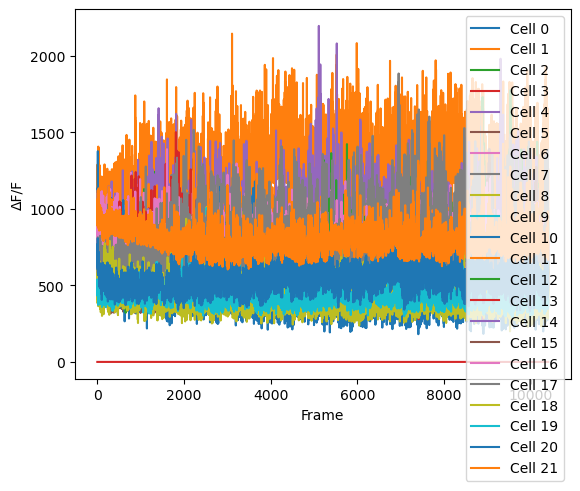

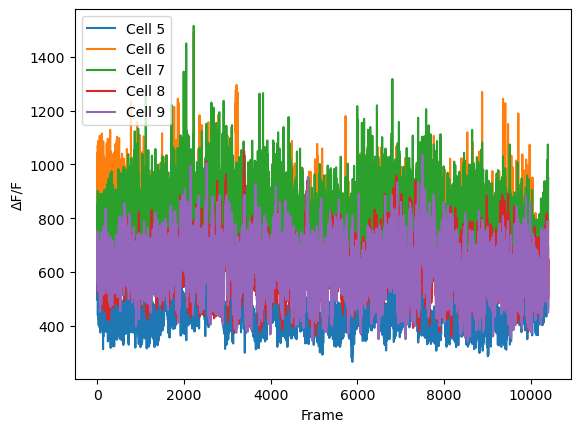

In [26]:
from twop.plots import *

plot_dff_traces(suite2p_output)
# can specify cell range to plot
plot_dff_traces(suite2p_output, cell_range=[5,10])

<Axes: xlabel='Frame (#)', ylabel='Cell (#, relative in range)'>

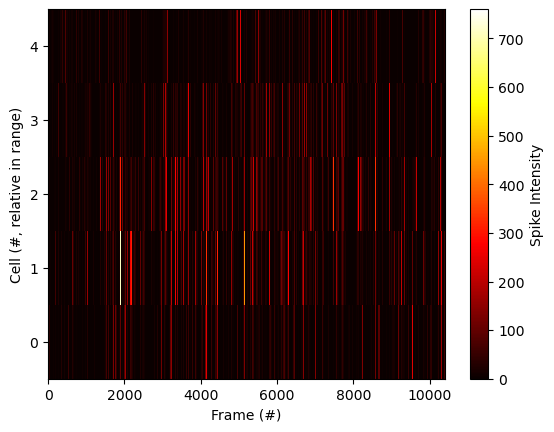

In [27]:
smoothed_event_plot(suite2p_output, cell_range=[5, 10])

### Get a frame dataframe with estimated relative time since t0 and raw scope times in seconds since recording start

In [29]:
frame_df_out = os.path.join(data_basepath, 'frame_df.csv')
frame_df = all_data.make_frame_df(output_csv= False, output_filepath= frame_df_out)
frame_df

,timeEst,frame_time
0,0.000000,40.64420
1,0.732064,41.37605
2,1.464129,42.10800
3,2.196193,42.83995
4,2.928258,43.57190
...,...,...
10395,7609.809663,7649.32815
10396,7610.541728,7650.06010
10397,7611.273792,7650.79205
10398,7612.005857,7651.52400


### Ex. get raw facemap dict output

In [30]:
all_data.facemap_data

{'filenames': [['/mnt/Batista_Lab/Arenski/2p_22q_lamp5/WT7628/WT7628_day1/WT7628_10_21_24_Lamp5GCamp_V1_MMN/WT7628_10_21_24_Lamp5GCamp_V1_MMN_face_2024-10-21-155230-0000.avi']],
 'save_path': '/mnt/Batista_Lab/Arenski/2p_22q_lamp5/WT7628/WT7628_day1/WT7628_10_21_24_Lamp5GCamp_V1_MMN',
 'Ly': [482],
 'Lx': [644],
 'sbin': 4,
 'fullSVD': False,
 'save_mat': True,
 'Lybin': array([120], dtype=int32),
 'Lxbin': array([161], dtype=int32),
 'sybin': array([0]),
 'sxbin': array([0]),
 'LYbin': np.int64(120),
 'LXbin': np.int64(161),
 'avgframe': [array([[60.42169 , 53.488995, 49.087685, ..., 51.704308, 51.863434,
          52.164192],
         [48.28631 , 45.272377, 46.113064, ..., 48.88519 , 48.167187,
          49.80181 ],
         [42.576683, 41.035   , 42.309246, ..., 47.097813, 46.018   ,
          46.261753],
         ...,
         [ 9.778375,  9.856188, 10.736375, ..., 35.09162 , 33.840374,
          33.922188],
         [ 9.768187,  9.75    , 10.394625, ..., 35.634   , 34.48281 ,
    

### Get a state dataframe with camera aligned times and state values

In [2]:
#from state.getFacemapData import get_state_df
import state.getFacemapData as fmd
state_dataframe = fmd.get_state_df(all_data.facemap_data, all_data.camera_times, treadmill_signal = all_data.treadmill_raw, min_dur_s=1)
state_dataframe.head()

NameError: name 'all_data' is not defined

### Get a frame aligned state dataframe, including nearest frames at camera times

In [37]:
frame_state_df = all_data.frame_state_df(state_dataframe)
# to output csv ->
# frame_state_df = all_data.frame_state_df(state_dataframe, output_csv=True)
frame_state_df.head()

,time,nearest_frame_idx,frame_start_time,motion_bool,locomotion_bool,motion,pupil,treadmill
0,31.24910,0,40.6442,0,0,0.624611,0.810747,0.247091
1,31.28505,0,40.6442,0,0,0.605309,0.810168,0.214522
2,31.32125,0,40.6442,0,0,0.568584,0.810551,0.198717
3,31.35580,0,40.6442,0,0,0.517887,0.802877,0.215213
4,31.38975,0,40.6442,0,0,0.457706,0.816970,0.210656


### Plot a state timeline

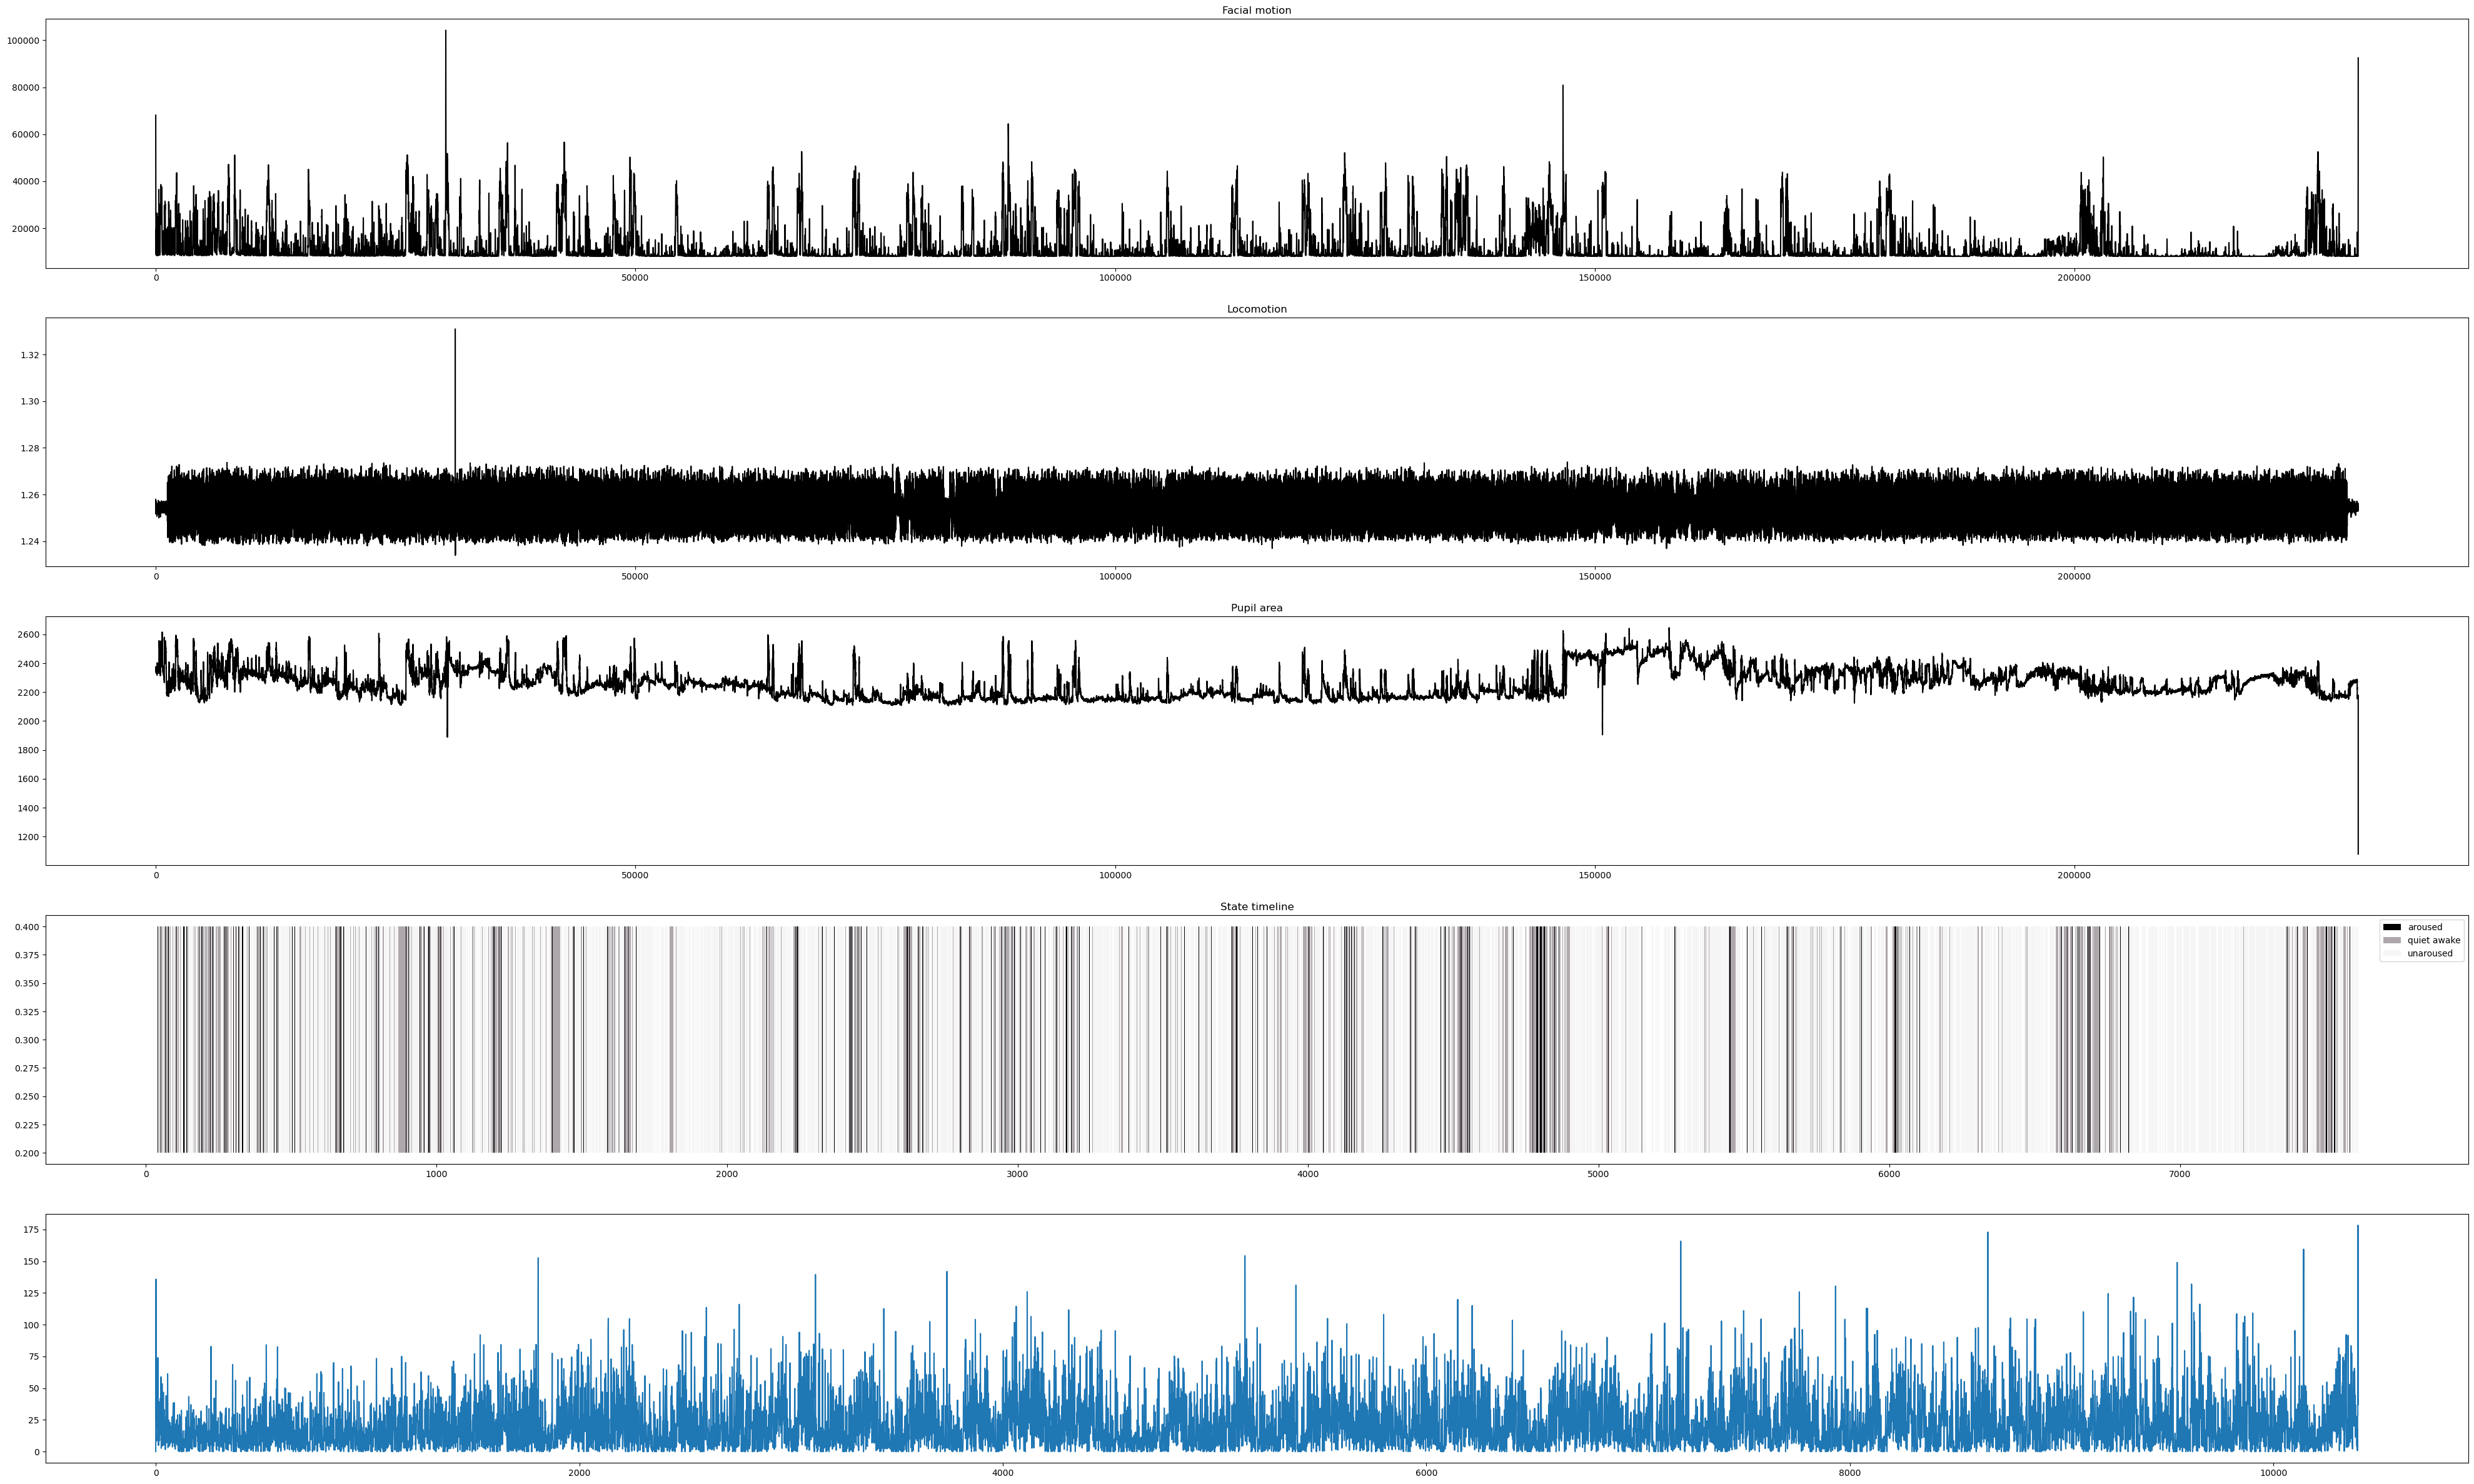

In [ ]:
from state.getFacemapData import plot_state_timeline
from 
plot_state_timeline(state_dataframe, spikes_arr.mean(axis=0))